# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [4]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Passo 1: Entendimento do Desafio
import pandas as pd
import numpy as np

ads = pd.read_csv('advertising.csv')
display(ads)
#Passo 2: Entendimento da Área/Empresa
#Passo 3: Extração/Obtenção de Dados

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

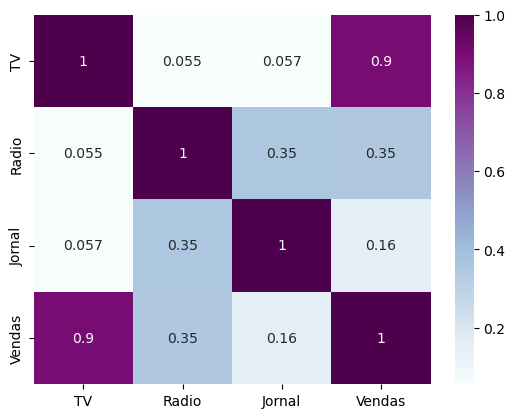

In [10]:
#Passo 4: Análise Exploratória
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ads.corr(),annot = True,cmap="BuPu")
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [13]:
#Fase de treino da IA(Y é o que queremos aprender, X é o que a IA vai aprender)

y = ads['Vendas']
x = ads[['TV','Radio','Jornal']]

from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino, y_teste = train_test_split(x ,y , test_size=0.18)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_regressaoLinear = LinearRegression()
model_arvoredecisao = RandomForestRegressor()

model_regressaoLinear.fit(x_treino, y_treino)
model_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [26]:
#Avaliação IA

previsao_regressaoLinear = model_regressaoLinear.predict(x_teste)
previsao_arvore = model_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste,previsao_regressaoLinear))
print(r2_score(y_teste,previsao_arvore))

0.8552530493867516
0.9537852733064786


#### Visualização Gráfica das Previsões

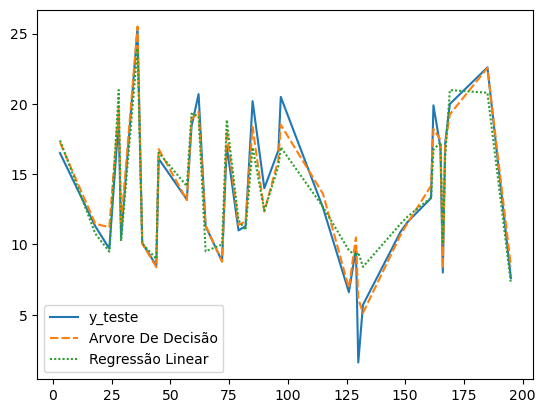

In [31]:
dataframe = pd.DataFrame()
dataframe['y_teste'] = y_teste
dataframe['Arvore De Decisão'] = previsao_arvore
dataframe['Regressão Linear'] = previsao_regressaoLinear

sns.lineplot(data=dataframe)
plt.show()

#### Como fazer uma nova previsão?

In [27]:
novos = pd.read_csv("novos.csv")
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [28]:
previsao = model_arvoredecisao.predict(novos)
print(previsao)

[ 7.515  8.916 19.611]


In [32]:
#Teste de valores com dataframe
dataframe1 = pd.DataFrame()
dataframe1['TV'] = [150,250,400]
dataframe1['Radio'] = [50,85,70]
dataframe1['Jornal'] = [15,30,80]

previsao = model_arvoredecisao.predict(dataframe1)
print(previsao)

[17.664 25.007 25.64 ]
